<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- You can check “Meta” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

In [11]:
!pip install patool

     |████████████████████████████████| 81kB 8.5MB/s 


In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
import patoolib
patoolib.extract_archive("/content/gdrive/MyDrive/Data - German Traffic Sign Recognition.rar", outdir="/content/gdrive/MyDrive/German_data")

patool: Extracting /content/gdrive/MyDrive/Data - German Traffic Sign Recognition.rar ...
patool: running /usr/bin/unrar x -- "/content/gdrive/MyDrive/Data - German Traffic Sign Recognition.rar"
patool:     with cwd='/content/gdrive/MyDrive/German_data'
patool: ... /content/gdrive/MyDrive/Data - German Traffic Sign Recognition.rar extracted to `/content/gdrive/MyDrive/German_data'.


'/content/gdrive/MyDrive/German_data'

In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Activation,Flatten,MaxPooling2D,BatchNormalization,GlobalMaxPool2D
from keras.preprocessing.image import ImageDataGenerator,img_to_array, array_to_img, load_img
import os
import numpy as np
 

### Initialize ImageDataGenerator (5 Marks)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in validation

In [47]:
image_datagenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.25
)

### Get training data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [48]:
DIR_PATH='/content/gdrive/MyDrive/German_data/Data - German Traffic Sign Recognition/Data - German Traffic Sign Recognition/Train'

In [49]:
# Number of Classes
NUM_CATEGORIES = len(os.listdir(DIR_PATH))
NUM_CATEGORIES

33

In [50]:
image_size=30
batch_size=64


In [51]:
#Build training generator. 
train_generator = image_datagenerator.flow_from_directory(DIR_PATH,
                                                    target_size=(image_size, image_size),
                                                    subset='training',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    shuffle=True,
                                                    seed= 9
                                                )

Found 22124 images belonging to 33 classes.


### Get validation data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [52]:


#Build validation generator
val_generator = image_datagenerator.flow_from_directory(DIR_PATH,
                                                   target_size=(image_size, image_size),                                                   
                                                   subset='validation',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   color_mode='rgb',
                                                   shuffle=True,
                                                   seed= 9
                                                )

Found 7364 images belonging to 33 classes.


### Define model (5 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [53]:
tf.keras.backend.clear_session()
model=Sequential()
# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(image_size,image_size,3)))


# Second Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
#Fourth Convolution layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

In [55]:
# Flattening the layer and adding Dense Layer
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

### Compile the model (2 Marks)
- Specify optimizer, loss & metrics

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('german-traffic.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max',
                                                    verbose=1)

### Get model summary (2 Marks)

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

### Fit the model (3 Marks)
- Specify epochs
- Specify batch_size
- Give validation_data
- Validation accuracy should be more than 90%

In [59]:
history = model.fit(train_generator,
          epochs=50,
          steps_per_epoch= 22124//batch_size,  #Number of training images//batch_size
          validation_data=val_generator,
          validation_steps = 7364//batch_size, #Number of validation images//batch_size
          callbacks = [model_checkpoint]
)

Epoch 1/50
345/345 [==============================] - 50s 142ms/step - loss: 3.0491 - accuracy: 0.1270 - val_loss: 2.3736 - val_accuracy: 0.2948

Epoch 00001: val_accuracy improved from -inf to 0.29484, saving model to german-traffic.h5
Epoch 2/50
345/345 [==============================] - 49s 143ms/step - loss: 1.8880 - accuracy: 0.4061 - val_loss: 1.7025 - val_accuracy: 0.4736

Epoch 00002: val_accuracy improved from 0.29484 to 0.47364, saving model to german-traffic.h5
Epoch 3/50
345/345 [==============================] - 50s 145ms/step - loss: 1.2520 - accuracy: 0.5870 - val_loss: 1.4290 - val_accuracy: 0.5761

Epoch 00003: val_accuracy improved from 0.47364 to 0.57609, saving model to german-traffic.h5
Epoch 4/50
345/345 [==============================] - 50s 144ms/step - loss: 0.9294 - accuracy: 0.6946 - val_loss: 1.1342 - val_accuracy: 0.6664

Epoch 00004: val_accuracy improved from 0.57609 to 0.66644, saving model to german-traffic.h5
Epoch 5/50
345/345 [=======================

### Draw plots (3 Marks)


- Plot training accuracy and validation accuracy with respect to epochs
- Plot training loss and validation loss with respect to epochs

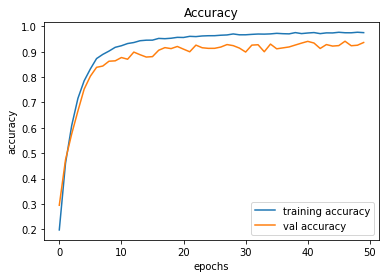

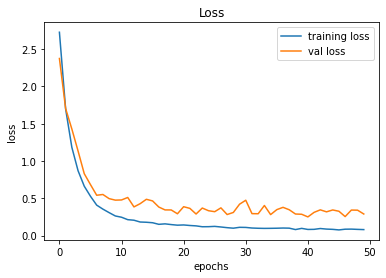

In [60]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

